<a href="https://colab.research.google.com/github/iamsaksham77/ALY6110/blob/main/Module4_BostonHousing_Hive_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
df = spark.read.csv("BostonHousing.csv", header=True)

In [5]:
#Showing the schema of the dataset
df.printSchema()

root
 |-- crim: string (nullable = true)
 |-- zn: string (nullable = true)
 |-- indus: string (nullable = true)
 |-- chas: string (nullable = true)
 |-- nox: string (nullable = true)
 |-- rm: string (nullable = true)
 |-- age: string (nullable = true)
 |-- dis: string (nullable = true)
 |-- rad: string (nullable = true)
 |-- tax: string (nullable = true)
 |-- ptratio: string (nullable = true)
 |-- b: string (nullable = true)
 |-- lstat: string (nullable = true)
 |-- medv: string (nullable = true)



In [6]:
#Converting all the colums from string to double
from pyspark.sql.functions import col
df = df.select([col(c).cast("double").alias(c) for c in df.columns])
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: double (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: double (nullable = true)
 |-- tax: double (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [7]:
# Step 2: Install PyHive and Thrift
!pip install pyhive thrift

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyhive: filename=PyHive-0.7.0-py3-none-any.whl size=53872 sha256=18c532aff4fc8aae05ebd20a04baba90e2945633d1711dd6586727e160cc35c7
  Stored in directory: /root/.cache/pip/wheels/d3/fc/31/6974270c69ccc5bf8f848e2e41b527d0e8f5b9b973696a29a9
  Created wheel for thrift: filename=thrift-0.20.0-cp310-cp310-linux_x86_64.whl size=375009 sha256=b8d4c3da64a16d6231139f03402507295e91553259a20338859a411c684b19a7
  Stored in directory: /root/.cache/pip/wheels/14/71/f9/849c9a9e9dbf246125223f9d12abc05fb72f56e7659c0dd5ff
Successfully built pyhive thrift


In [9]:
spark.sql("CREATE DATABASE IF NOT EXISTS BostonHousing")
spark.sql("USE BostonHousing")

DataFrame[]

In [10]:
df.write.saveAsTable("Bostonhousingdataset")

In [11]:
#1. Displaying the first 5 rows of the dataset.
spark.sql("SELECT * FROM Bostonhousingdataset LIMIT 5").show()

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|  tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421|78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185|61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998|45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147|54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+



In [12]:
#2. Reporting the total number of records in the dataset.
spark.sql("SELECT COUNT(*) FROM Bostonhousingdataset").show()

+--------+
|count(1)|
+--------+
|     506|
+--------+



In [18]:
#3. Showing statistics for the column medv
spark.sql("SELECT AVG(medv) AS mean_medv, stddev(medv) AS standard_deviation_medv, min(medv) AS min_medv, max(medv) AS max_medv FROM Bostonhousingdataset").show()

+------------------+-----------------------+--------+--------+
|         mean_medv|standard_deviation_medv|min_medv|max_medv|
+------------------+-----------------------+--------+--------+
|22.532806324110698|      9.197104087379815|     5.0|    50.0|
+------------------+-----------------------+--------+--------+



In [19]:
#4. Mean of rm column
spark.sql("SELECT AVG(rm) AS mean_rm FROM Bostonhousingdataset").show()

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [20]:
#5. Property with highest crime rate
spark.sql("SELECT * FROM Bostonhousingdataset WHERE crim = (SELECT MAX(crim) FROM Bostonhousingdataset)").show()

+-------+---+-----+----+-----+-----+----+------+----+-----+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis| rad|  tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+----+-----+-------+-----+-----+----+
|88.9762|0.0| 18.1| 0.0|0.671|6.968|91.9|1.4165|24.0|666.0|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+----+-----+-------+-----+-----+----+



In [21]:
#6. Property with lowest median home value
spark.sql("SELECT * FROM Bostonhousingdataset WHERE medv = (SELECT MIN(medv) FROM Bostonhousingdataset)").show()

+-------+---+-----+----+-----+-----+-----+------+----+-----+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis| rad|  tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+----+-----+-------+------+-----+----+
|38.3518|0.0| 18.1| 0.0|0.693|5.453|100.0|1.4896|24.0|666.0|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1| 0.0|0.693|5.683|100.0|1.4254|24.0|666.0|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+----+-----+-------+------+-----+----+



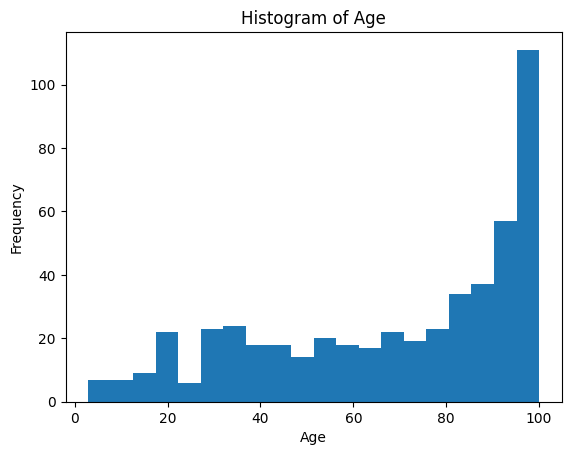

In [23]:
#7. Histogram of Age column
import matplotlib.pyplot as plt

# Select the "age" column and collect it as a list
ages = df.select("age").rdd.flatMap(lambda x: x).collect()

# Create a histogram of the ages
plt.hist(ages, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()


In [25]:
#8.  Percentage of properties with a "chas" value of 1
spark.sql("SELECT COUNT(IF(chas = 1, chas, NULL)) AS num_properties_with_chas_1, (COUNT(IF(chas = 1, chas, NULL))/COUNT(*)) * 100 AS percent_properties_with_chas_1  FROM Bostonhousingdataset").show()

+--------------------------+------------------------------+
|num_properties_with_chas_1|percent_properties_with_chas_1|
+--------------------------+------------------------------+
|                        35|              6.91699604743083|
+--------------------------+------------------------------+



In [26]:
#9. Correlation between rm and medv
spark.sql("SELECT corr(rm, medv) AS correlation_coefficient FROM Bostonhousingdataset").show()

+-----------------------+
|correlation_coefficient|
+-----------------------+
|     0.6953599470715401|
+-----------------------+



In [27]:
#10. Correlation between "ptratio" (pupil-teacher ratio) and "nox"
spark.sql("SELECT corr(ptratio, nox) AS correlation_coefficient_pt_nox FROM Bostonhousingdataset").show()

+------------------------------+
|correlation_coefficient_pt_nox|
+------------------------------+
|           0.18893267711276893|
+------------------------------+



In [28]:
#11. Displaying the top 5 neighbourhoods with highest median values
spark.sql("SELECT * FROM Bostonhousingdataset ORDER BY medv DESC LIMIT 5").show()

+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|  tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+
|1.51902| 0.0|19.58| 1.0|0.605|8.375|93.9| 2.162|5.0|403.0|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46| 0.0|0.422|7.875|32.0|5.6484|4.0|255.0|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58| 0.0|0.605|7.929|96.2|2.0459|5.0|403.0|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58| 1.0|0.605|7.802|98.2|2.0407|5.0|403.0|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58| 0.0|0.605|7.489|90.8|1.9709|5.0|403.0|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+-----+-------+------+-----+----+



In [31]:
#12. Average property age for neighbourhoods with chas value 1 vs chas value 0
spark.sql("SELECT AVG(IF(chas = 1, age, NULL)) AS avg_age_chas_1, AVG(IF(chas = 0, age, NULL)) AS avg_age_chas_0 FROM Bostonhousingdataset").show()

+-----------------+-----------------+
|   avg_age_chas_1|   avg_age_chas_0|
+-----------------+-----------------+
|77.50000000000001|67.91167728237794|
+-----------------+-----------------+



In [47]:
#13. Creating a hive view property_age_view
spark.sql("create or replace view property_age_view as select age, medv FROM Bostonhousingdataset")





DataFrame[]

In [48]:
#Querying the view created.
spark.sql("SELECT * FROM property_age_view LIMIT 5").show()

+----+----+
| age|medv|
+----+----+
|65.2|24.0|
|78.9|21.6|
|61.1|34.7|
|45.8|33.4|
|54.2|36.2|
+----+----+



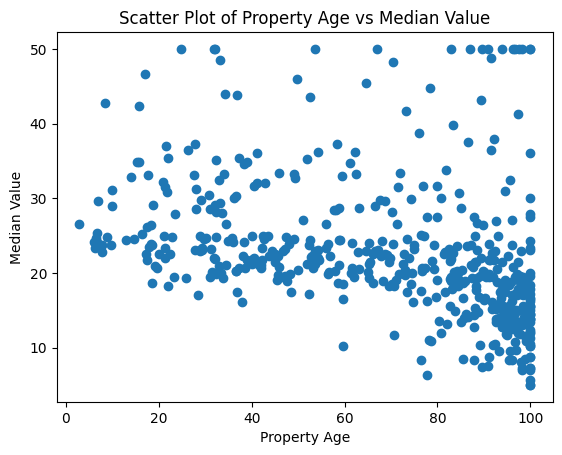

In [49]:
#14. Scatterplot between age and medv
# Select the 'age' and 'medv' columns
selected_columns = df.select('age', 'medv')

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = selected_columns.toPandas()

# Create a scatter plot
plt.scatter(pandas_df['age'], pandas_df['medv'])
plt.xlabel('Property Age')
plt.ylabel('Median Value')
plt.title('Scatter Plot of Property Age vs Median Value')
plt.show()

In [50]:
#15. Properties with a "crim" value greater than 10
spark.sql("SELECT * FROM Bostonhousingdataset WHERE crim > 10").show()

+-------+---+-----+----+-----+-----+-----+------+----+-----+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis| rad|  tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+----+-----+-------+------+-----+----+
|13.5222|0.0| 18.1| 0.0|0.631|3.863|100.0|1.5106|24.0|666.0|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1| 0.0|0.668|4.906|100.0|1.1742|24.0|666.0|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1| 0.0|0.668|4.138|100.0| 1.137|24.0|666.0|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1| 0.0|0.671|7.313| 97.9|1.3163|24.0|666.0|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1| 0.0|0.671|6.649| 93.3|1.3449|24.0|666.0|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1| 0.0|0.671| 6.38| 96.2|1.3861|24.0|666.0|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1| 0.0|0.671|6.223|100.0|1.3861|24.0|666.0|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1| 0.0|0.671|6.968| 91.9|1.4165|24.0|666.0|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1| 0.0|0.671|6.545| 99.1|1

In [57]:
#Hypothesis Testing
#Null Hypothesis: There exists no relationship between the variables rm and medv.
#Alternate Hypothesis: There exists a linear relationship between the variables rm and medv.

spark.sql("WITH stats AS (SELECT avg(medv) AS avg_medv, avg(rm) AS avg_rm, var_pop(rm) AS var_rm, covar_pop(rm, medv) AS covar_rm_medv FROM Bostonhousingdataset) SELECT covar_rm_medv/var_rm as slope, avg_medv - (covar_rm_medv / var_rm) * avg_rm AS intercept FROM stats").show()

+----------------+------------------+
|           slope|         intercept|
+----------------+------------------+
|9.10210898118032|-34.67062077643868|
+----------------+------------------+

